In [1]:
import os 
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import pandas as pd

def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data(os.path.join("datasets", "housing"))
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

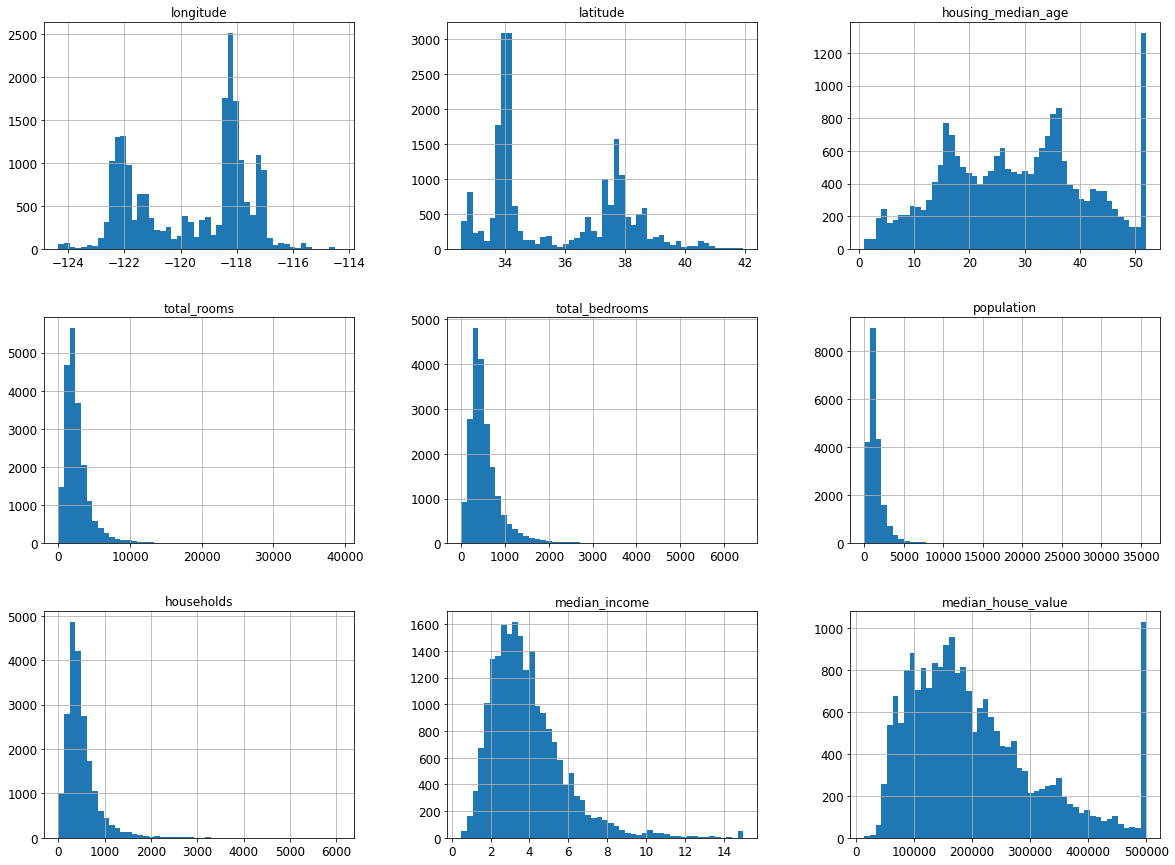

In [6]:
housing.hist(bins=50, figsize=(20,15))

#  Split Data

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
housing.drop("income_cat", axis = 1, inplace= True)    

# Discover and visualize the data to gain insights

In [34]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

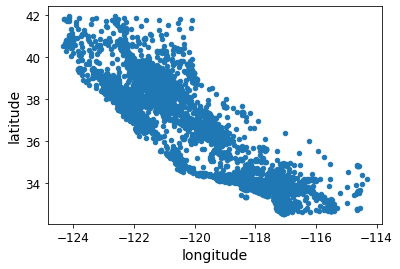

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude")


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

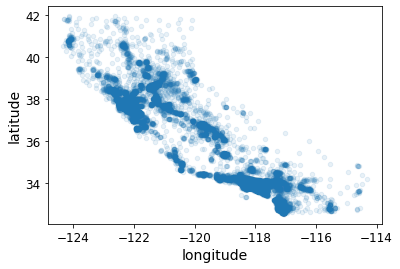

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


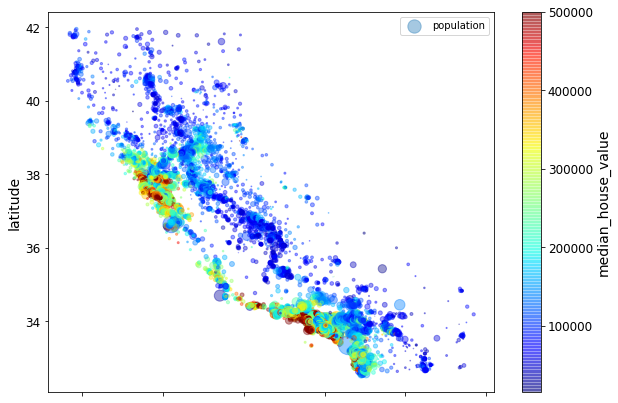

In [13]:
housing.plot(kind="scatter", x = "longitude", y= 'latitude', alpha= .4, 
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [15]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

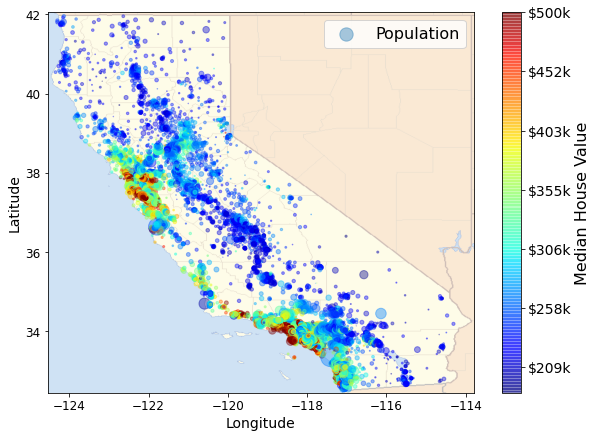

In [16]:
import matplotlib.image as mpimg

images_path = os.path.join("images", "end_to_end_project")
filename = "california.png"

california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

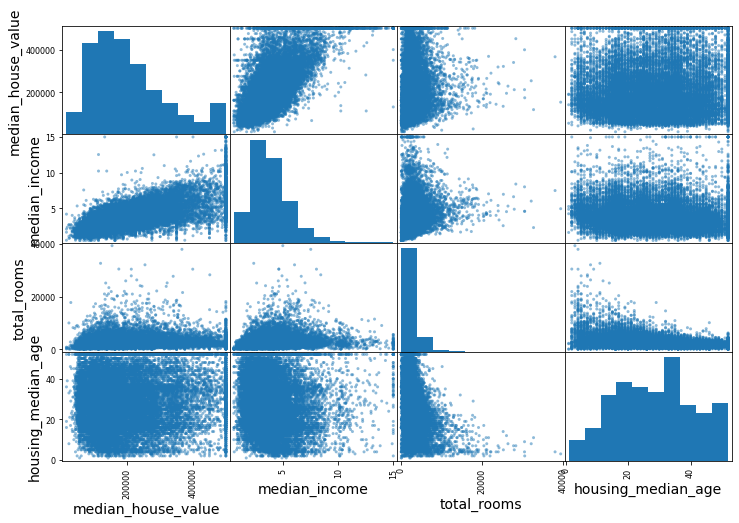

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

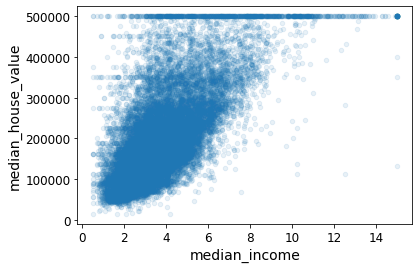

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

#  Data cleaning and transforming :

 create a custom transformer to add extra attributes:

In [35]:
housing = strat_train_set.copy()
housing.drop(["income_cat", "median_house_value"], axis = 1, inplace= True) 
housing_labels = strat_train_set["median_house_value"].copy()

In [ ]:
strat_train_set

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [39]:
pd.DataFrame(housing_extra_attribs)

,0,1,2,3,4,5,6,7,8,9,10
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
2,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,6.052381,2.728571
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,4.635659,4.077519
16509,-116.4,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,6.346405,2.742484
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,5.505618,3.808989


# pipeline transforming

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# missing feature
from sklearn.impute import SimpleImputer

housing_num = housing.drop("ocean_proximity", axis = 1)
num_pipeline = Pipeline([("imputer", SimpleImputer(strategy= "median")),
                         ("atr_adder", CombinedAttributesAdder()),
                         ("std_transform", StandardScaler())])
                         
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [41]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_columns = list(housing_num)
cat_attribs = ["ocean_proximity"]
fully_pipline = ColumnTransformer([("num_pipe", num_pipeline, num_columns),
                                  ("cat", OneHotEncoder(), cat_attribs)])
housing_prepared = fully_pipline.fit_transform(housing)

In [42]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


# Select and train a model 

In [43]:
# LinearRegression => underfitting
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [44]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_pr = fully_pipline.transform(some_data)
some_pred = lin_reg.predict(some_data_pr)

print("Predictions:", lin_reg.predict(some_data_pr))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [45]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
rmse = mean_squared_error(housing_prediction, housing_labels, squared= False)
# rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 68628.19819848923


In [46]:
# DecisionTreeRegressor => overfitting

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

tree_pred = tree_reg.predict(some_data_pr)

print("Predictions:", tree_pred)
print("Labels:", list(some_labels))

Predictions: [286600. 340600. 196900.  46300. 254500.]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [47]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared= False)
tree_rmse

0.0

In [48]:
# RandomForestRegressor => best model before regularization
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [49]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

# Better evaluation using cross validation

In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [51]:
# DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring= "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [69497.55929165 68036.6245992  72154.8091729  68275.76166497
 70986.07401526 75295.79512147 70658.31800467 70853.27962487
 77077.90541718 69963.48905946]
Mean: 71279.96159716371
Standard deviation: 2749.869231878089


In [52]:
# lin reg
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring= "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798342


In [53]:
# forest_reg
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


# Fine-tune your model

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [55]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [56]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64509.863976468594 {'max_features': 2, 'n_estimators': 3}
55338.94051887084 {'max_features': 2, 'n_estimators': 10}
53152.92085307777 {'max_features': 2, 'n_estimators': 30}
59983.88215296472 {'max_features': 4, 'n_estimators': 3}
53413.253602251265 {'max_features': 4, 'n_estimators': 10}
50449.13948775247 {'max_features': 4, 'n_estimators': 30}
59217.409234803614 {'max_features': 6, 'n_estimators': 3}
52054.612596377665 {'max_features': 6, 'n_estimators': 10}
49987.11326409128 {'max_features': 6, 'n_estimators': 30}
58376.376321930475 {'max_features': 8, 'n_estimators': 3}
51993.44252586774 {'max_features': 8, 'n_estimators': 10}
50185.202775452424 {'max_features': 8, 'n_estimators': 30}
62824.396890858756 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54428.32295723476 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59289.02900584059 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52639.44780309763 {'bootstrap': False, 'max_features': 3, 'n_estimato

# randomized search

In [58]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
forest_reg = RandomForestRegressor()
random_grid = RandomizedSearchCV(forest_reg, param_distributions = param_distribs, 
                           n_iter = 10, cv = 5, scoring='neg_mean_squared_error', random_state=42)
random_grid.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42bb6b2400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42ba8be880>},
                   random_state=42, scoring='neg_mean_squared_error')

In [59]:
cvres = random_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49073.88944464755 {'max_features': 7, 'n_estimators': 180}
51714.14359949999 {'max_features': 5, 'n_estimators': 15}
50608.19241458657 {'max_features': 3, 'n_estimators': 72}
50648.57368922919 {'max_features': 5, 'n_estimators': 21}
49290.95044149937 {'max_features': 7, 'n_estimators': 122}
50526.55136856164 {'max_features': 3, 'n_estimators': 75}
50623.65512367116 {'max_features': 3, 'n_estimators': 88}
49471.10913589945 {'max_features': 5, 'n_estimators': 100}
50167.09378853082 {'max_features': 3, 'n_estimators': 150}
63718.107747217175 {'max_features': 5, 'n_estimators': 2}


In [61]:
random_grid.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180)

# feature importances

In [62]:
feature_importances = random_grid.best_estimator_.feature_importances_ 

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = fully_pipline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = list(housing_num) + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.35818534365808613, 'median_income'),
 (0.1526770881864163, 'INLAND'),
 (0.10957380961488956, 'pop_per_hhold'),
 (0.0724624299084352, 'longitude'),
 (0.06593470548509851, 'bedrooms_per_room'),
 (0.06418082482074416, 'latitude'),
 (0.05183467600359977, 'rooms_per_hhold'),
 (0.04371420973501114, 'housing_median_age'),
 (0.01653900682873527, 'total_rooms'),
 (0.01634664834561291, 'population'),
 (0.015544703892966315, 'total_bedrooms'),
 (0.015073882209962081, 'households'),
 (0.01076608161694577, '<1H OCEAN'),
 (0.004307721214967066, 'NEAR OCEAN'),
 (0.0027772238190798084, 'NEAR BAY'),
 (8.16446594500139e-05, 'ISLAND')]

In [63]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 5241 to 2398
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           4128 non-null   float64 
 1   latitude            4128 non-null   float64 
 2   housing_median_age  4128 non-null   float64 
 3   total_rooms         4128 non-null   float64 
 4   total_bedrooms      4079 non-null   float64 
 5   population          4128 non-null   float64 
 6   households          4128 non-null   float64 
 7   median_income       4128 non-null   float64 
 8   median_house_value  4128 non-null   float64 
 9   ocean_proximity     4128 non-null   object  
 10  income_cat          4128 non-null   category
dtypes: category(1), float64(9), object(1)
memory usage: 359.0+ KB


# Evaluate on test data

In [66]:
X_test = strat_test_set.drop(["income_cat", "median_house_value"], axis=1)
y_test = strat_test_set["median_house_value"].copy()
x_test_pr = fully_pipline.transform(X_test)

In [67]:
test_pred = random_grid.predict(x_test_pr)
rmse = mean_squared_error(y_test, test_pred, squared= False)
rmse

46974.16288833782

We can compute a 95% confidence interval for the test RMSE:

In [68]:
from scipy import stats

confidence = 0.95
squared_errors = (test_pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([44990.28259489, 48877.58617354])